In [8]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [9]:
df_less = pd.read_csv('lessfocus_session1.csv')
df_less['Label'] = 'LessFocus'
print(df_less.shape)
df_less.head()

(2075, 13)


,sample id,signal strength,attention,meditation,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma,Label
0,4,0,34,78,415628,270927,73872,29689,40235,22693,3011,1928,LessFocus
1,5,0,27,66,310075,63831,4481,5885,4393,3647,768,364,LessFocus
2,6,0,13,41,62251,188588,8501,2151,2728,5478,1513,664,LessFocus
3,7,0,11,37,69792,70668,21516,13410,10925,10298,2699,1597,LessFocus
4,8,0,21,48,19222,12323,12281,4305,906,6246,1525,1530,LessFocus


In [10]:
df_max = pd.read_csv('maxfocus_session1.csv')
df_max['Label'] = 'MaxFocus'
print(df_max.shape)
df_max.head()

(1358, 13)


,sample id,signal strength,attention,meditation,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma,Label
0,0,0,47,14,645099,10794,814,16687,23023,28252,18471,24338,MaxFocus
1,1,0,44,7,101701,40733,4130,731,578,2543,1536,2996,MaxFocus
2,2,0,40,4,749068,148760,28417,21363,24013,15383,19746,16793,MaxFocus
3,3,0,38,14,1424839,393788,110174,32255,37433,29006,14169,11108,MaxFocus
4,4,0,21,21,1361707,209396,176985,21027,32389,32752,18557,46012,MaxFocus


In [11]:
#df_med = pd.read_csv('meditation_session1.csv', usecols=range(12))
#df_med['Label'] = 'Med'

#df_med.rename(columns={'high gamma0': 'high gamma'}, inplace=True)
#print(df_med.shape)
#df_med.head()

In [13]:
# Combine the dataframes using concat
df = pd.concat([df_max, df_less], ignore_index=True)

# Print the shape and the first few rows of the combined dataframe
print(df.shape)
df.head()

(3433, 13)


,sample id,signal strength,attention,meditation,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma,Label
0,0,0,47,14,645099,10794,814,16687,23023,28252,18471,24338,MaxFocus
1,1,0,44,7,101701,40733,4130,731,578,2543,1536,2996,MaxFocus
2,2,0,40,4,749068,148760,28417,21363,24013,15383,19746,16793,MaxFocus
3,3,0,38,14,1424839,393788,110174,32255,37433,29006,14169,11108,MaxFocus
4,4,0,21,21,1361707,209396,176985,21027,32389,32752,18557,46012,MaxFocus


### CLASS COUNT

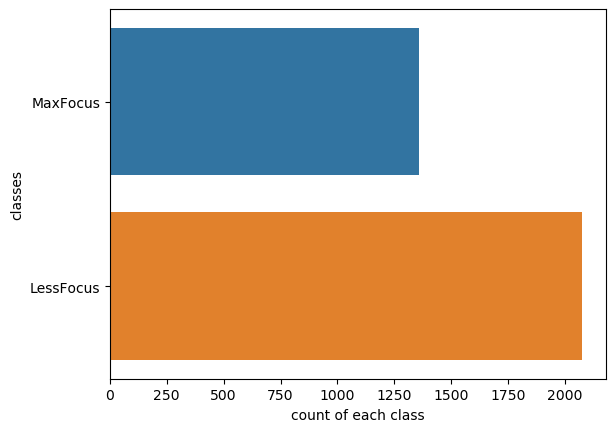

In [14]:

#Visualize Class Counts
sns.countplot(y=df.Label ,data=df) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [15]:
#in which column of our dataset is there at least a missing values?
df.isna().any()

sample id          False
signal strength    False
attention          False
meditation         False
delta              False
theta              False
low alpha          False
high alpha         False
low beta           False
high beta          False
low gamma          False
high gamma         False
Label              False
dtype: bool

In [16]:
#come trattiamo le variabili categoriche 
print(df.dtypes)

sample id           int64
signal strength     int64
attention           int64
meditation          int64
delta               int64
theta               int64
low alpha           int64
high alpha          int64
low beta            int64
high beta           int64
low gamma           int64
high gamma          int64
Label              object
dtype: object


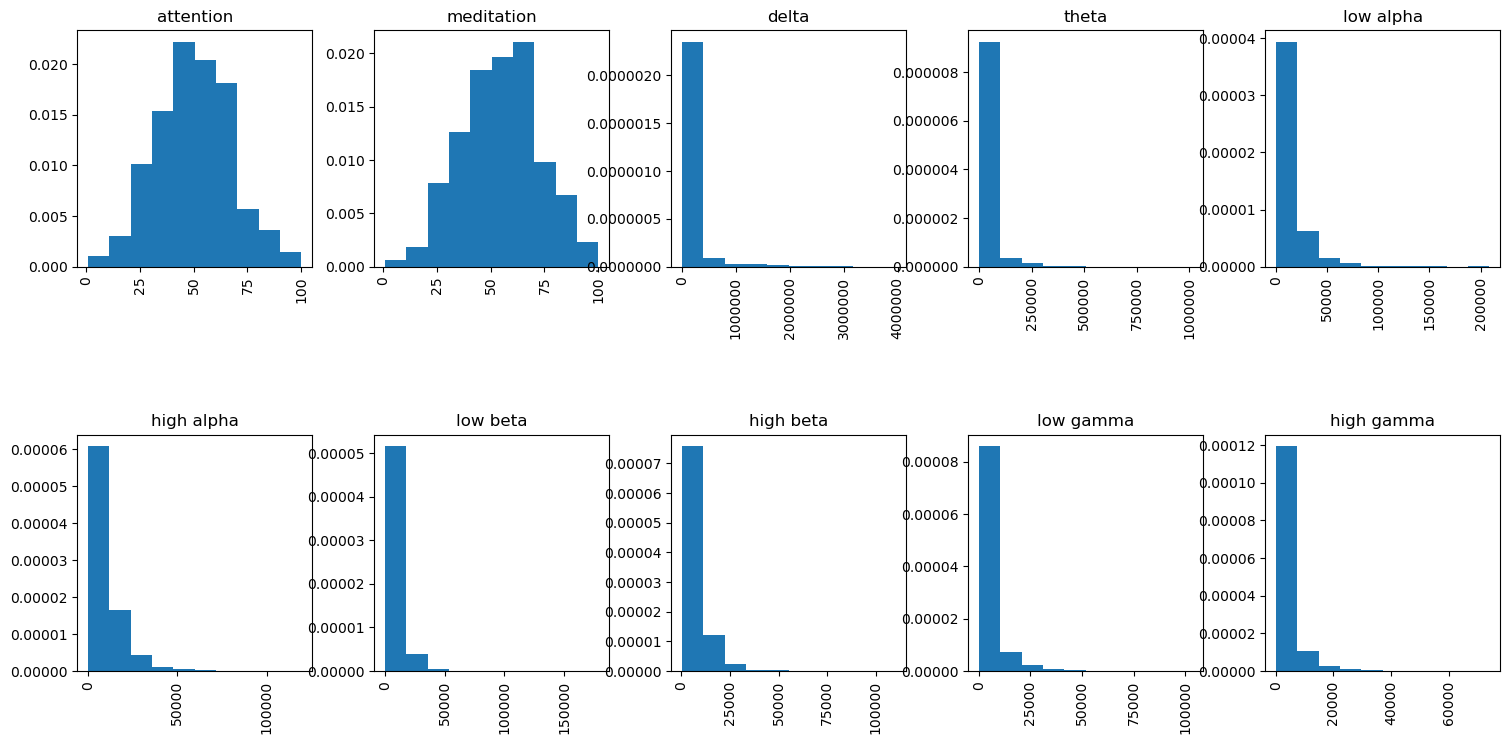

In [17]:
fig, axes = plt.subplots(2, 5,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)
columns = ['attention','meditation','delta','theta','low alpha','high alpha','low beta','high beta','low gamma','high gamma'];
num = df[columns];
i=0
for x in num.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(num[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

In [18]:
col_to_transform = ['delta', 'theta', 'low alpha', 'high alpha', 'low beta', 'high beta', 'low gamma', 'high gamma']
num[col_to_transform] = num[col_to_transform].astype(float)
num[col_to_transform] = num[col_to_transform].apply(lambda x: np.log(x + 1))


C:\Users\scrpa\.vscode\Anaconda\envs\AndreasEnv\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


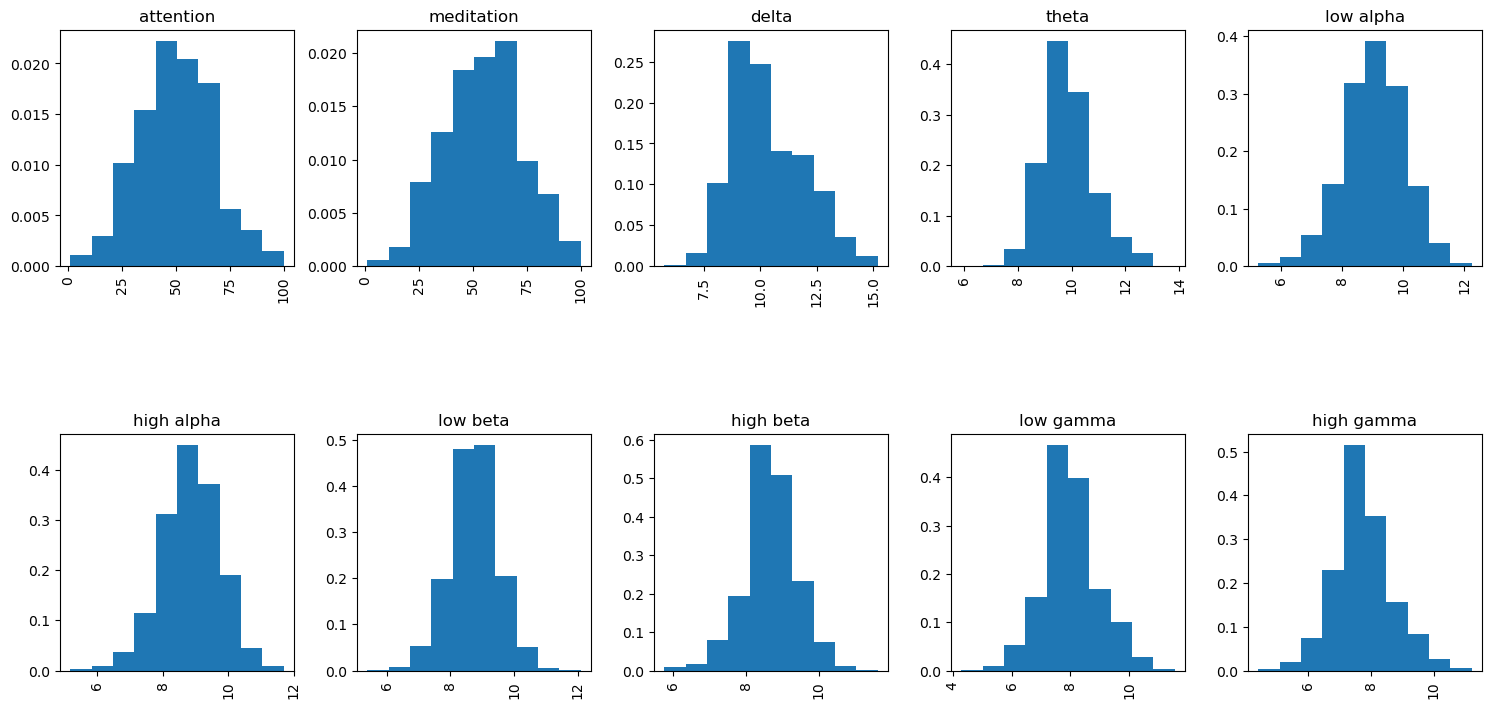

In [19]:
fig, axes = plt.subplots(2, 5,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)
i=0
for x in num.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(num[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1

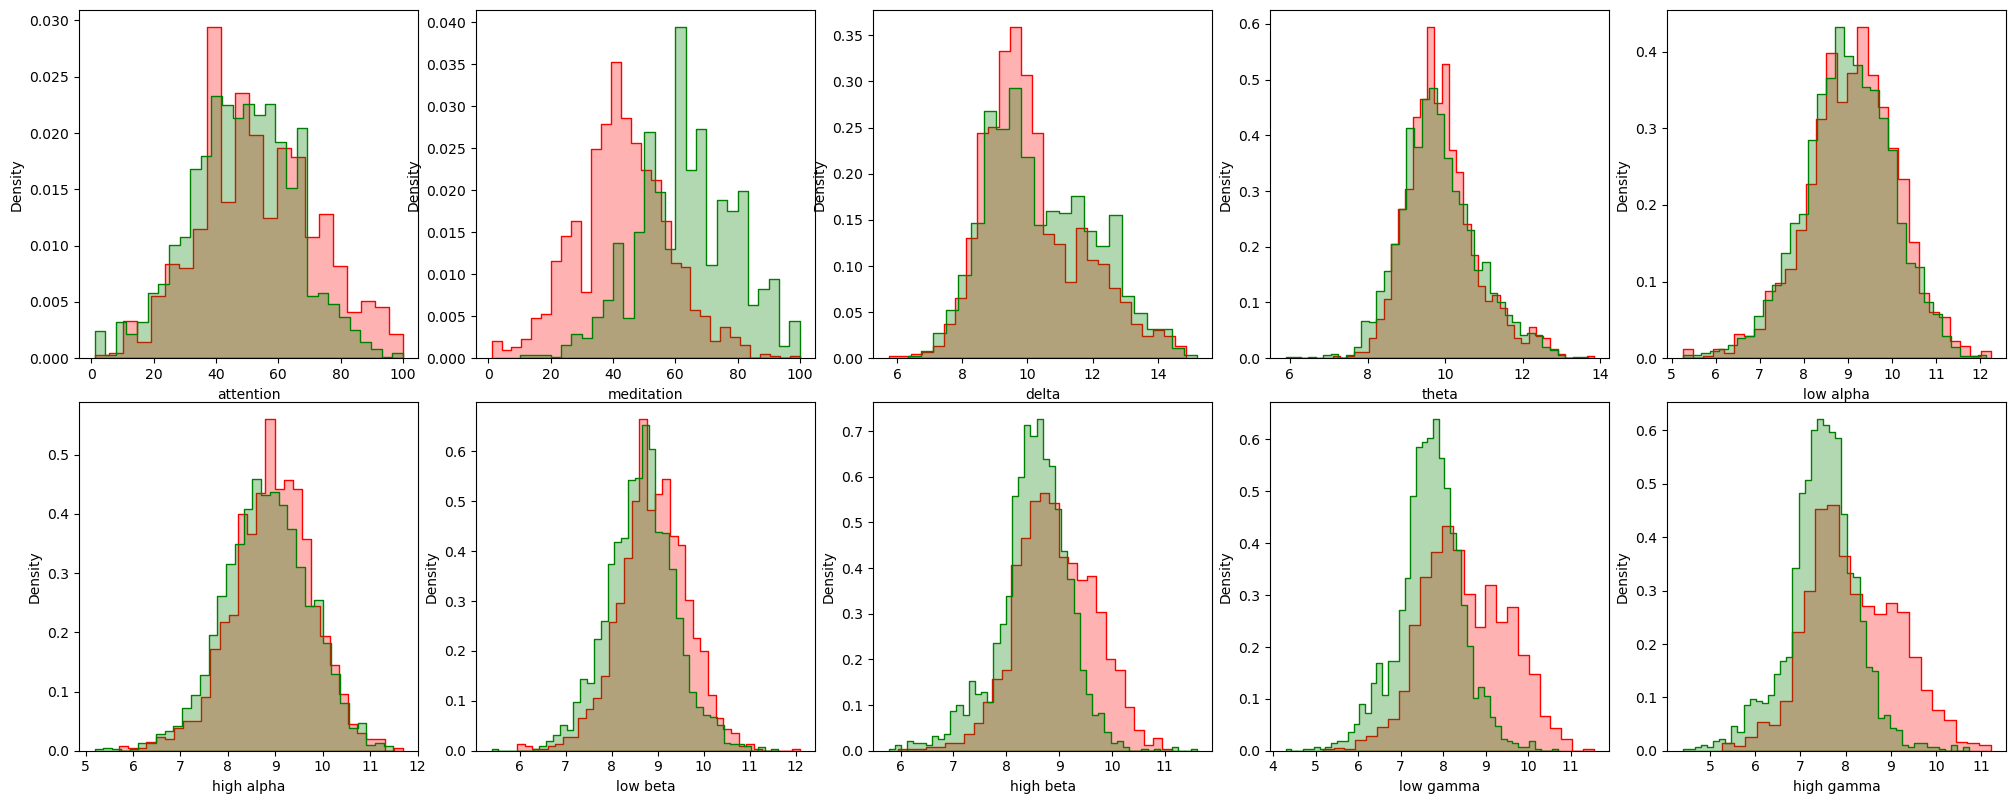

In [20]:
X0 = num[df['Label']=='Med']
X1 = num[df['Label']=='MaxFocus']
X2 = num[df['Label']=='LessFocus']

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(num.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density',   element="step",  alpha=0.3)
    sns.histplot(X2.iloc[:,i], color="green", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()


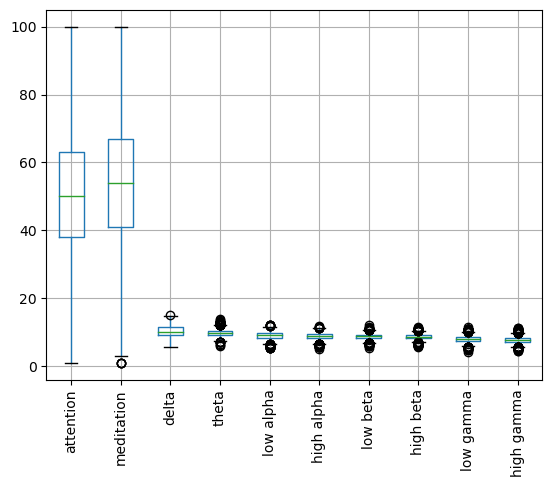

In [21]:
num.boxplot(rot=90)

In [22]:
X=num[col_to_transform]
print(X.shape)
X.tail()

(3433, 8)


,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma
3428,12.624197,10.463018,8.994297,9.289059,8.256348,7.519692,6.269096,5.849325
3429,12.527290,11.895095,9.539716,9.132054,8.780941,8.293299,8.117611,7.303170
3430,11.908172,10.538396,9.221775,8.393442,7.864804,7.236339,6.895683,6.846943
3431,11.603305,12.426308,8.881142,10.246190,10.893326,9.686761,8.452335,6.931472
3432,12.706554,11.660216,10.532523,10.433733,9.447308,9.078522,7.886081,7.237778


In [23]:
y=(df['Label']=='LessFocus').astype(int)

print(len(y))

3433


In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   
                                                    stratify=y,        #preserve target propotions (probviamo non stratificata)
                                                    random_state= 321) #fix random seed for replicability

# Instantiate the SMOTE class and perform oversampling on the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_tra
print( X_train.shape, X_test.shape)

(2904, 8) (1030, 8)


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [26]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    print("\n")
    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))  
    print("\n")
    print(confusion_matrix(y_test, y_pred))
    return ( f1_score(y_train, y_pred_train),f1_score(y_test, y_pred) )

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.3f' % auc)
    return (fpr, tpr ,auc)

In [27]:
 from sklearn.ensemble import RandomForestClassifier


classifier= RandomForestClassifier()
parameters = {'n_estimators' :     [8,10,100],
              'criterion' :        ['entropy', 'gini'],
              'max_depth' :        np.arange(5,10,1), 
              'min_samples_split': np.arange(5,10,1),
              'min_samples_leaf' : [2,4,6,8,]
             };


RF_f1_train,RF_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
f1_train: 0.747561 using {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}


f1         train 0.856   test 0.769


[[253 154]
 [138 485]]
